In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# Load your dataset
file_path = "../csvs/shuffled_data.csv"
data = pd.read_csv(file_path)

# Separate features from target (if you have a target variable)
X = data.drop(columns=["target"])  # Replace "target_column" with your actual target column name

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Initialize PCA
pca = PCA(n_components=0.95)  # Keeps enough components to explain 95% of variance

# Fit PCA to the standardized data
X_pca = pca.fit_transform(X_scaled)


In [7]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance:", sum(explained_variance))

Explained variance by each component: [0.17410682 0.12436305 0.10084454 0.08977273 0.08085726 0.07825437
 0.06857638 0.06484626 0.06289212 0.05646558 0.05206551]
Total explained variance: 0.953044614859494


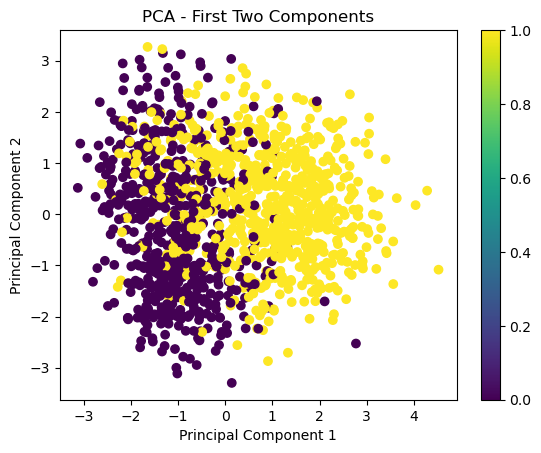

In [8]:
import matplotlib.pyplot as plt

# Plot for the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["target"], cmap='viridis')  # Use target column if available
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First Two Components")
plt.colorbar()
plt.show()

In [9]:
# Show top features for each component
for i, component in enumerate(pca.components_):
    component_df = pd.DataFrame(component, index=X.columns, columns=[f'PC{i+1}']).sort_values(by=f'PC{i+1}', key=abs, ascending=False)
    print(f"\nTop features for Principal Component {i+1}:")
    print(component_df.head())


Top features for Principal Component 1:
                        PC1
noofmajorvessels   0.457450
slope              0.435419
restingBP          0.417838
fastingbloodsugar  0.368540
serumcholestrol    0.319414

Top features for Principal Component 2:
                      PC2
chestpain        0.529282
oldpeak         -0.481677
restingrelectro  0.408686
gender          -0.384911
age              0.311908

Top features for Principal Component 3:
                      PC3
gender           0.539419
serumcholestrol -0.482974
chestpain        0.372594
restingrelectro  0.243311
slope            0.227972

Top features for Principal Component 4:
                    PC4
maxheartrate   0.702687
age           -0.559338
exerciseangia -0.348837
oldpeak       -0.156134
restingBP      0.142360

Top features for Principal Component 5:
                        PC5
exerciseangia      0.769782
age               -0.431392
chestpain          0.233095
fastingbloodsugar -0.208996
restingrelectro    0.188786

To